## Assignment 4
### Part 2, subparts a) and b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('dark_background')
#plt.rcParams['figure.facecolor'] = 'None'
#plt.rcParams['axes.facecolor'] = 'None'

### Here we study the Lotka–Volterra equations
Also known as the 'predetor prey' model

$\frac{dx}{dt}=ax-byx$

$\frac{dy}{dt}=-cy+dyx$

Looking again at the equations, we notice the following:

* Firstly, $a$ and $c$ increase and decrease the scale of $x$ and $y$ respectively

Of course, if this was all there was to the equations, it would be unbalanced,
because $x$ would simply grow and $y$ would simply shrink.

* Secondly, $b$ and $d$ decrease and increase the product $xy$ respectively

This serves as a balancing force, being opposite sign to the first terms, and also couples the equations together.

In [2]:
def LV(initial, t, a, b, c, d):

    x, y = initial
    dx_dt = a*x - b*y*x
    dy_dt = -c*y + d*y*x

    return [dx_dt, dy_dt]

def plotZ(Z):

    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    x, y = Z[:,0], Z[:,1]

    ax[0].plot(t, x, c='pink', label='bunnies', zorder=2)
    ax[0].plot(t, y, c='orange', label='foxes', zorder=1)
    ax[1].plot(x, y, label='phase', alpha=0.5)
    ax[0].legend(facecolor='k'); ax[1].legend(facecolor='k')
    plt.show()

First we explore the very basics of the coupled equations.

We analogize $x$ with bunny population (prey) and $y$ with fox population (predator)

In [3]:
#initial conditions
x0 = 2 #initial prey
y0 = 1 #initial pred

#parameterization
a = 1 #prey growth rate
b = 1 #prey death rate due to pred
c = 1 #pred death rate
d = 1 #pred growth rate due to pred

ABCD = (a, b, c, d)
t = np.arange(0, 20, 0.1)

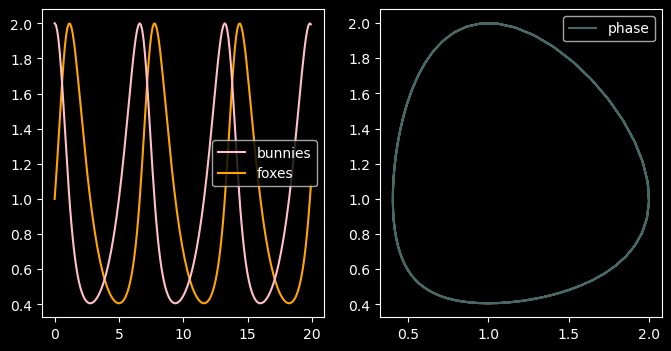

In [4]:
Z = odeint(LV, [x0, y0], t, ABCD)
plotZ(Z)

In the analogy, we can understand it as bunny population growing by default, and fox population decreasing -- however, more bunnies increases foxes, and yet more foxes decreases bunnies.

This ecosystem is self-corrective, meaning, the chain of events might be seen as the following loop:


>bunnies increase <br>
>foxes increase <br>
>bunnies decrease <br>
>foxes decrease <br>
>*repeat*

However, even though the system can be said to be self-corrective, it is not necessarily robust under perturbation. In fact, it happens to be a rather delicate balance -- simply adding random noise on the order of $10^{-5}$ can break the whole feedback loop.

### Now we play with it to see if we can't get more interesting dynamics

In [5]:
def LV2(initial, t, a, b, c, d, n):

    x, y = initial
    dx_dt = (a*x - b*y*x) + n*np.sin(t)
    dy_dt = (-c*y + d*y*x) + n*np.cos(t)

    return [dx_dt, dy_dt]

In [6]:
a, b, c, d = [np.random.uniform(0,10) for i in range(4)]
noise = np.random.uniform(0,1)
print(a, b, c, d, noise)

8.170138434820846 7.224642804443423 9.097863993245166 6.12347024199477 0.866387877667236


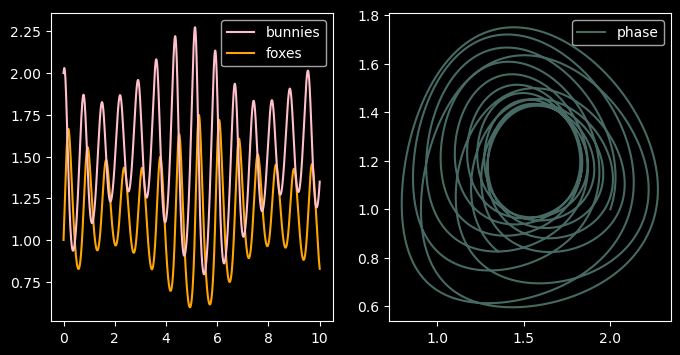

In [7]:
args = (a, b, c, d, noise)
t = np.linspace(0, 10, int(1e5))

Z = odeint(LV2, [x0, y0], t, args)
plotZ(Z)

### Now we explore 3 coupled equations (the Lorentz Attractor)

$\frac{dx}{dt}=\sigma(y-x)$

$\frac{dy}{dt}=x(\rho-z)-y$

$\frac{dz}{dt}=xy-\beta z$

In [8]:
def lorentz(initial, t, rho, sigma, beta):

  x, y, z = initial

  dx_dt = sigma*(y - x)
  dy_dt = x*(rho - z) - y
  dz_dt = x*y - beta*z

  return [dx_dt, dy_dt, dz_dt]

def plotL(L):

    fig, ax = plt.subplots(1, 4, figsize=(10,3))
    x, y, z = L[:,0], L[:,1], L[:,2]

    ax[0].plot(t, x, c='y', label='x', alpha=0.5)
    ax[0].plot(t, y, c='r', label='y', alpha=0.5)
    ax[0].plot(t, z, c='b', label='z', alpha=0.5)
    ax[0].legend(facecolor='k')

    ax[1].plot(x, y, alpha=0.5); ax[1].set_title('xy')
    ax[2].plot(y, z, alpha=0.5); ax[2].set_title('yz')
    ax[3].plot(z, x, alpha=0.5); ax[3].set_title('zx')

    for a in ax: a.set_xticks([]); a.set_yticks([])
    plt.show()

In [9]:
Phi = (1 + np.sqrt(5))/2

rho = Phi**13
sigma = Phi**11
beta = Phi**3

initial = [Phi, 1-Phi, Phi**2]

t = np.linspace(0, 50, int(1e5))

args = (rho, sigma, beta)

L = odeint(lorentz, initial, t, args)

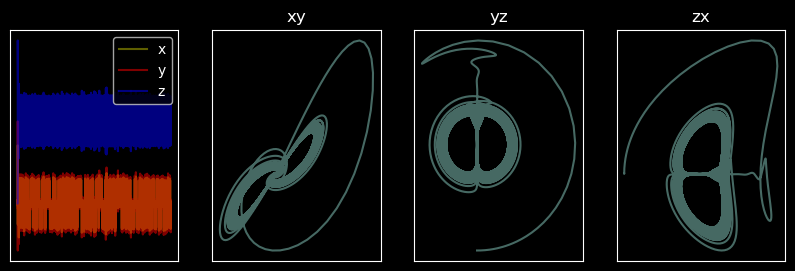

In [10]:
plotL(L)